Exercise 1

In this exercise you should implement everything including the
tests (e.g. the chi-square and KS tests) yourself. Later, when your
code is working you are free to use builtin functions.

1. Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.

(a) Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

(b) Evaluate the quality of the generator by graphical
descriptive statistics (histogrammes, scatter plots) and
statistical tests - χ
2
,Kolmogorov-Smirnov, run-tests, and
correlation test.

(c) Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice.

2. Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too.

3. You were asked to simulate one sample and perform tests on
this sample. Discuss the sufficiency of this approach and take
action, if needed.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2
import scipy.stats as stats


In [67]:
#![image-2.png](attachment:image-2.png)

# 1

# a)

In [6]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

In [105]:
U = random_num (10000,9,1111,113,2**24)

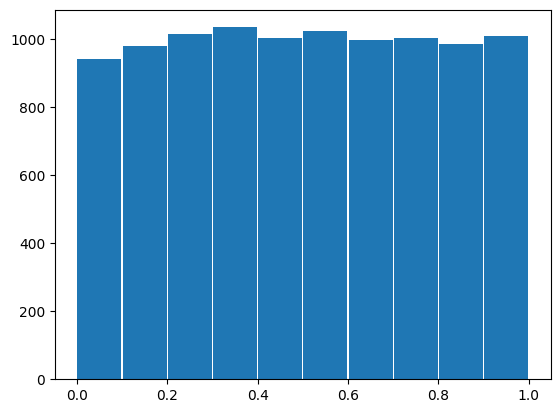

In [71]:
plt.hist(U, bins=10, rwidth=0.975)
plt.show()

In [72]:
#plt.hist(U, bins=10, rwidth=0.975)
#plt.show()

# b) 

Histogram and scatter plot

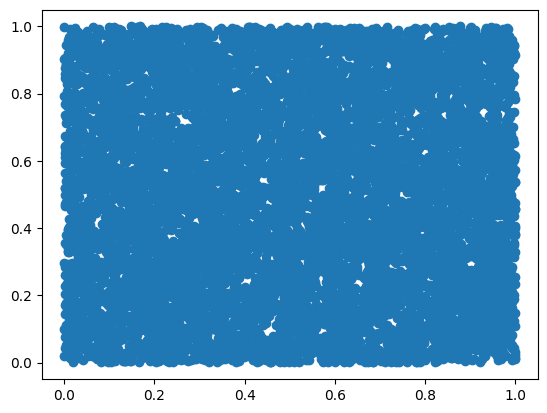

In [73]:
plt.scatter(U[:-1], s[1:])
plt.show()

# chi-square test


In [74]:
#X2 test

def chisquare(obs, no_class):
    Observed, bins = np.histogram(obs, bins= no_class)
    expct =  len(obs)/no_class
    T = 0
    for i in Observed:
        xx = ((i-expct)**2)/expct
        T+= xx
    p = chi2.pdf(T,9)
    print('p-value is:',p)
    if(p <= 0.05):
        print('The generated random numbers are not uniformly distributed')
    else:
        print('The generated random numbers are uniformly distributed')


In [75]:
chisquare(U, 10)

p-value is: 0.09991585517170648
The generated random numbers are uniformly distributed


# Kolmogorov-Smirnov

In [77]:

def KStest(random_num):
    data_sorted = np.sort(random_num)
    fo = data_sorted
    N = len(random_num)
    f = np.cumsum(data_sorted)
    fr =f/f[-1] 
    D = np.max(np.abs(fo - fr))
    ks_calculated_score = (math.sqrt(N) + 0.12 + 0.11/ math.sqrt(N)) * D
    print('Kolmogrov-Smirnov calculated score is:', ks_calculated_score)
    ks_sig = 1.358 # 
    if(ks_calculated_score < ks_sig):
        print('The generated random numbers are uniformly distributed')
    else:
        print('The generated random numbers are not uniformly distributed')

In [79]:
KStest(U)

Kolmogrov-Smirnov calculated score is: 25.037327681314157
The generated random numbers are not uniformly distributed


# Independence Test 
Run-tests I


In [82]:
#Independence Test

def Run_Test_I(random_num):
    N = len(random_num)
    med_rand_numbers = np.median(random_num)
    run_vec = ['D' if x < med_rand_numbers else 'U' for x in random_num]
    
    run_number = 0
    k = 1
    while(k <= len(run_vec)):
        j = k
        while(j < len(run_vec)):
            if(run_vec[j-1] == run_vec[j]):
                j = j + 1
                if(j == len(run_vec)):
                    run_number = run_number + 1
            else:
                run_number = run_number + 1
                break
        #end of inner while
        k = j + 1
        if(k == len(run_vec)):
            run_number = run_number + 1
    ## end of while\
    n1 = run_vec.count('U')
    n2 = run_vec.count('D')
    R_hat = (2 *n1 * n2)/ (n1 + n2) + 1
    S_R_squ = (2 * n1 * n2) * (2 * n1 * n2 - n1 - n2)/((n1 + n2)**2 * (n1 + n2 - 1))
    Z_ts = (run_number - R_hat)/math.sqrt(S_R_squ)
    print('Z score is: ', abs(Z_ts))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(Z_ts) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
        

In [83]:
Run_Test_I(U)

Z score is:  0.9600480084015002
Failed to reject Ho
The generated random numbers are independent


In [91]:
def compute_run_lengths(s):
    length = 1
    lengths = np.empty( 0 , dtype = 'int' )
    for i in range(len(s)-1):
        if (s[i]>s[i+1]):
            lengths= np.append(lengths,length)
            length=1
        else:
            length+=1
    lengths= np.append(lengths,length)
    lengths[lengths > 6] = 6
    unique, counts = np.unique(lengths, return_counts=True)
    return unique, counts


In [115]:
def Run_Test_II(sample):
    N = len(sample)
    unique , counts = compute_run_lengths(sample)
    
    
    R = np.asarray([counts])

    A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840]).T


    V = (1 / (N - 6)) * (R - N * B) @ A @ (R - N * B).T  # To compare with Chi2(6) distribution
    p_RT2 = chi2.sf(V, 6)  # Using the upper tail of the chi-square distribution
    
    print('Z score is: ', abs(p_RT2))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(p_RT2) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
        

In [116]:
Run_Test_II(U)

Z score is:  [[0.61258832]]
Failed to reject Ho
The generated random numbers are independent


# Correlation test

In [135]:
def correlation_test(U, h):
    n = len(U)
    score = sum([U[i]*U[i+h] for i in range(n-h)])/(n-h)
    
    return score

In [138]:
#correlation_test(U,10)
stats.norm.cdf(correlation_test(U,10),0.25,7/(144*len(U)))

1.0

# 1c)

In [120]:
U2 = random_num (10000,3,100,20000,65530)

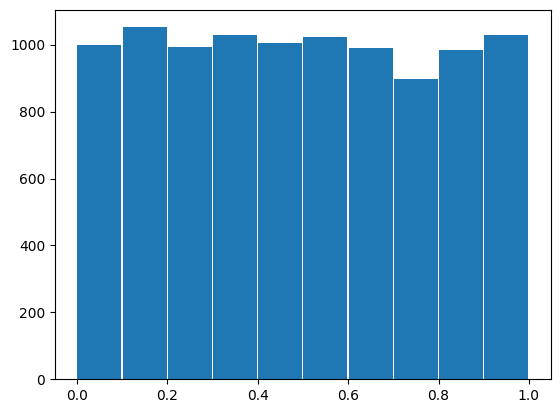

In [121]:
plt.hist(U2, bins=10, rwidth=0.975)
plt.show()

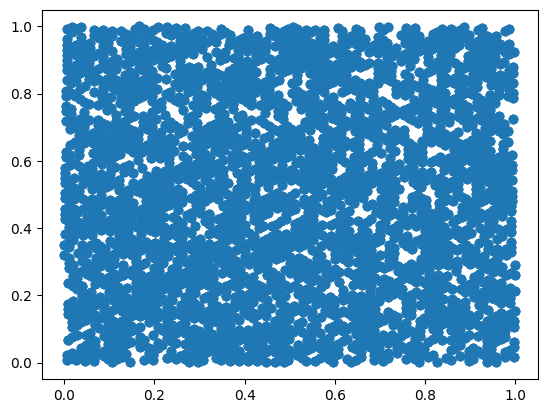

In [123]:
plt.scatter(U2[:-1], s[1:])
plt.show()

In [124]:
chisquare(U2, 10)

p-value is: 0.02040558453414498
The generated random numbers are not uniformly distributed


In [125]:
KStest(U2)

Kolmogrov-Smirnov calculated score is: 24.75295558364875
The generated random numbers are not uniformly distributed


In [126]:
Run_Test_I(U2)

Z score is:  3.6801840322057506
Reject H0, and H1 is true
The generated random numbers are not independent


In [127]:
Run_Test_II(U2)

Z score is:  [[0.2028728]]
Failed to reject Ho
The generated random numbers are independent


In [139]:
correlation_test(U2,15)

0.24547906601348443